<a href="https://colab.research.google.com/github/LLima25/Valuation/blob/main/Valuation_Tupy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy_financial
!pip install yfinance
import numpy_financial as npf
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import cov
from statistics import variance
import yfinance as yf

df_dre = pd.read_excel("https://github.com/LLima25/Valuation/blob/main/tupy3.xlsx?raw=true", sheet_name="DRE")
df_dre = df_dre.set_index('DRE')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
#Crescimento da receita último ano
receita_g1 = (df_dre.loc["Receita Líquida",2011] / df_dre.loc["Receita Líquida", 2010]) - 1

In [4]:
#DRE dos próximos 5 anos com base no crescimento da receita e margens do último ano
dre1 = pd.DataFrame.from_dict(df_dre[2011])
dre1.columns = ['2011']
dre1["% da Receita"] = dre1 / dre1.iloc[0]
dre1['Ano 1'] = (dre1["2011"]["Receita Líquida"] * (1+receita_g1)) * dre1["% da Receita"]
dre1['Ano 2'] = (dre1["Ano 1"]["Receita Líquida"] * (1+receita_g1)) * dre1["% da Receita"]
dre1['Ano 3'] = (dre1["Ano 2"]["Receita Líquida"] * (1+receita_g1)) * dre1["% da Receita"]
dre1['Ano 4'] = (dre1["Ano 3"]["Receita Líquida"] * (1+receita_g1)) * dre1["% da Receita"]
dre1['Ano 5'] = (dre1["Ano 4"]["Receita Líquida"] * (1+receita_g1)) * dre1["% da Receita"]

In [5]:
#Balanço Patrimonial em % da Receita Líquida
df_bp = pd.read_excel("https://github.com/LLima25/Valuation/blob/main/tupy3.xlsx?raw=true", sheet_name="BP")
df_bp = df_bp.set_index('BP')
bp1 = pd.DataFrame.from_dict(df_bp[2011])
bp1.columns = ['2011']
bp1['% da Receita'] = bp1 / dre1['2011'].iloc[0]

#BP Estimado dos próximos 5 anos com base nas % da RL último ano
bp1['Ano 1'] = dre1['Ano 1']['Receita Líquida'] * bp1["% da Receita"]
bp1['Ano 2'] = dre1['Ano 2']['Receita Líquida'] * bp1["% da Receita"]
bp1['Ano 3'] = dre1['Ano 3']['Receita Líquida'] * bp1["% da Receita"]
bp1['Ano 4'] = dre1['Ano 4']['Receita Líquida'] * bp1["% da Receita"]
bp1['Ano 5'] = dre1['Ano 5']['Receita Líquida'] * bp1["% da Receita"]

In [6]:
#FCFF Estimado do Ano 1
#FCFF = NOPAT + Depreciação - NCG(Contas a Receber + Estoques - Fornecedor) - Capex
FCFF1 = {}
FCFF1['Ano 1'] ={}
FCFF1['Ano 1']['NOPAT'] = dre1['Ano 1']['Lucro Operacional (EBIT)'] + dre1['Ano 1']['Imposto de Renda e CSLL']
FCFF1['Ano 1']['Depreciação e Amortização'] = dre1['Ano 1']['Depreciação e Amortização']
FCFF1['Ano 1']['Contas a Receber'] = bp1['Ano 1']['Contas a receber'] - bp1['2011']['Contas a receber']
FCFF1['Ano 1']['Estoques'] = bp1['Ano 1'].iloc[4] - bp1['2011'].iloc[4]
FCFF1['Ano 1']['Fornecedores'] = bp1['Ano 1']['Fornecedores'] - bp1['2011']['Fornecedores']
FCFF1['Ano 1']['CAPEX'] = bp1['Ano 1']['Imobilizado'] - bp1['2011']['Imobilizado']
FCFF1['Ano 1']['FCFF'] = FCFF1['Ano 1']['NOPAT'] + FCFF1['Ano 1']['Depreciação e Amortização'] - FCFF1['Ano 1']['Contas a Receber'] - FCFF1['Ano 1']['Estoques'] + FCFF1['Ano 1']['Fornecedores'] - FCFF1['Ano 1']['CAPEX']

#FCFF Estimado do Ano 2
FCFF1['Ano 2'] ={}
FCFF1['Ano 2']['NOPAT'] = dre1['Ano 2']['Lucro Operacional (EBIT)'] + dre1['Ano 2']['Imposto de Renda e CSLL']
FCFF1['Ano 2']['Depreciação e Amortização'] = dre1['Ano 2']['Depreciação e Amortização']
FCFF1['Ano 2']['Contas a Receber'] = bp1['Ano 2']['Contas a receber'] - bp1['Ano 1']['Contas a receber']
FCFF1['Ano 2']['Estoques'] = bp1['Ano 2'].iloc[4] - bp1['Ano 1'].iloc[4]
FCFF1['Ano 2']['Fornecedores'] = bp1['Ano 2']['Fornecedores'] - bp1['Ano 1']['Fornecedores']
FCFF1['Ano 2']['CAPEX'] = bp1['Ano 2']['Imobilizado'] - bp1['Ano 1']['Imobilizado']
FCFF1['Ano 2']['FCFF'] = FCFF1['Ano 2']['NOPAT'] + FCFF1['Ano 2']['Depreciação e Amortização'] - FCFF1['Ano 2']['Contas a Receber'] - FCFF1['Ano 2']['Estoques'] + FCFF1['Ano 2']['Fornecedores'] - FCFF1['Ano 2']['CAPEX']

#FCFF Estimado do Ano 3
FCFF1['Ano 3'] ={}
FCFF1['Ano 3']['NOPAT'] = dre1['Ano 3']['Lucro Operacional (EBIT)'] + dre1['Ano 3']['Imposto de Renda e CSLL']
FCFF1['Ano 3']['Depreciação e Amortização'] = dre1['Ano 3']['Depreciação e Amortização']
FCFF1['Ano 3']['Contas a Receber'] = bp1['Ano 3']['Contas a receber'] - bp1['Ano 2']['Contas a receber']
FCFF1['Ano 3']['Estoques'] = bp1['Ano 3'].iloc[4] - bp1['Ano 2'].iloc[4]
FCFF1['Ano 3']['Fornecedores'] = bp1['Ano 3']['Fornecedores'] - bp1['Ano 2']['Fornecedores']
FCFF1['Ano 3']['CAPEX'] = bp1['Ano 3']['Imobilizado'] - bp1['Ano 2']['Imobilizado']
FCFF1['Ano 3']['FCFF'] = FCFF1['Ano 3']['NOPAT'] + FCFF1['Ano 3']['Depreciação e Amortização'] - FCFF1['Ano 3']['Contas a Receber'] - FCFF1['Ano 3']['Estoques'] + FCFF1['Ano 3']['Fornecedores'] - FCFF1['Ano 3']['CAPEX']

#FCFF Estimado do Ano 4
FCFF1['Ano 4'] ={}
FCFF1['Ano 4']['NOPAT'] = dre1['Ano 4']['Lucro Operacional (EBIT)'] + dre1['Ano 4']['Imposto de Renda e CSLL']
FCFF1['Ano 4']['Depreciação e Amortização'] = dre1['Ano 4']['Depreciação e Amortização']
FCFF1['Ano 4']['Contas a Receber'] = bp1['Ano 4']['Contas a receber'] - bp1['Ano 3']['Contas a receber']
FCFF1['Ano 4']['Estoques'] = bp1['Ano 4'].iloc[4] - bp1['Ano 3'].iloc[4]
FCFF1['Ano 4']['Fornecedores'] = bp1['Ano 4']['Fornecedores'] - bp1['Ano 3']['Fornecedores']
FCFF1['Ano 4']['CAPEX'] = bp1['Ano 4']['Imobilizado'] - bp1['Ano 3']['Imobilizado']
FCFF1['Ano 4']['FCFF'] = FCFF1['Ano 4']['NOPAT'] + FCFF1['Ano 4']['Depreciação e Amortização'] - FCFF1['Ano 4']['Contas a Receber'] - FCFF1['Ano 4']['Estoques'] + FCFF1['Ano 4']['Fornecedores'] - FCFF1['Ano 4']['CAPEX']

#FCFF Estimado do Ano 5
FCFF1['Ano 5'] ={}
FCFF1['Ano 5']['NOPAT'] = dre1['Ano 5']['Lucro Operacional (EBIT)'] + dre1['Ano 5']['Imposto de Renda e CSLL']
FCFF1['Ano 5']['Depreciação e Amortização'] = dre1['Ano 5']['Depreciação e Amortização']
FCFF1['Ano 5']['Contas a Receber'] = bp1['Ano 5']['Contas a receber'] - bp1['Ano 4']['Contas a receber']
FCFF1['Ano 5']['Estoques'] = bp1['Ano 5'].iloc[4] - bp1['Ano 4'].iloc[4]
FCFF1['Ano 5']['Fornecedores'] = bp1['Ano 5']['Fornecedores'] - bp1['Ano 4']['Fornecedores']
FCFF1['Ano 5']['CAPEX'] = bp1['Ano 5']['Imobilizado'] - bp1['Ano 4']['Imobilizado']
FCFF1['Ano 5']['FCFF'] = FCFF1['Ano 5']['NOPAT'] + FCFF1['Ano 5']['Depreciação e Amortização'] - FCFF1['Ano 5']['Contas a Receber'] - FCFF1['Ano 5']['Estoques'] + FCFF1['Ano 5']['Fornecedores'] - FCFF1['Ano 5']['CAPEX']

capexrate = FCFF1['Ano 5']['CAPEX'] / dre1['Ano 5']['Receita Líquida']

#Converter em pandas
FCFF_1 = pd.DataFrame.from_dict(FCFF1,orient='columns')
pd.options.display.float_format = '{:,.0f}'.format

In [7]:
#Calcular o WACC

#Beta com a %Retorno diário de TUPY e do IBOV nos últimos 12 meses
retorno1_1 = yf.download(["^BVSP", "TUPY3.SA"],start='2011-01-01',end='2011-12-31')["Adj Close"]
retorno1_1.columns = ['TUPY3', 'IBOV'];
retorno1_1['% IBOV'] = retorno1_1["IBOV"].pct_change()
retorno1_1["% TUPY3"] = retorno1_1["TUPY3"].pct_change()
retorno1_1 = retorno1_1[1:]

beta1_1 = retorno1_1["% TUPY3"].cov(retorno1_1["% IBOV"]) / retorno1_1["% IBOV"].var()


#Beta com a %Retorno mensal de TUPY e IBOV nos últimos 36 meses
retorno2_1 = yf.download(['^BVSP', 'TUPY3.SA'], start='2009-01-01', end='2011-12-31',interval='1mo')['Adj Close']
retorno2_1.columns = ['TUPY3', 'IBOV'];
retorno2_1['% IBOV'] = retorno2_1["IBOV"].pct_change()
retorno2_1["% TUPY3"] = retorno2_1["TUPY3"].pct_change()
retorno2_1 = retorno2_1[1:]

beta2_1 = retorno2_1["% TUPY3"].cov(retorno2_1["% IBOV"]) / retorno2_1["% IBOV"].var()

#Taxa Livre de Risco = Selic no final do ano estudado
#Retorno de mercado = Valorização Média Anual Aproximada do Ibov nos últimos 50 anos
RF = 0.1090
RM = 0.07

premio_risco1 = RM - RF

#CAPM = RF + (beta * (RM - RF))
CAPM1_1 = RF + (beta1_1 * premio_risco1)
CAPM2_1 = RF + (beta2_1 * premio_risco1)

#Custo da Dívida: kd1 = Despesa Financeira / Dívida Atual
divida1 = bp1['2011']['Dividas Curto Prazo'] + bp1['2011']['Dividas Longo Prazo']
kd1 = dre1['2011']['Despesas Financeiras'] / divida1

#Estrutura de Capital - Divida/(Divida + Equity)
debt1 = divida1 / (divida1 + bp1['2011']['Patrimônio Líquido'])
equity1 = bp1['2011']['Patrimônio Líquido'] / (divida1 + bp1['2011']['Patrimônio Líquido'])

#calcular wacc1 = (kd*(1-0.34)*Debt) + (ke*Equity)
#Taxa de Imposto IRPJ/CSLL Brasil
tax_rate = 0.34
wacc1_1 = ((kd1*(-1))*(1-tax_rate)*debt1) + (CAPM1_1*equity1)
wacc2_1 = ((kd1*-1)*(1-tax_rate)*debt1) + (CAPM2_1*equity1)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [8]:
#Perpetuidade
#Growth = Inflação de Longo Prazo
TV1_g = 0.03

TV1_1 = (FCFF1['Ano 5']['FCFF'] * (1+TV1_g)) / (wacc1_1 - TV1_g)
TV1p1_1 = TV1_1 / ((1+wacc1_1)**5)

TV2_1 = (FCFF1['Ano 5']['FCFF'] * (1+TV1_g)) / (wacc2_1 - TV1_g)
TV1p2_1 = TV2_1 / ((1+wacc2_1)**5)

#NPV do FCFF
FCFF_Lista1 = FCFF_1.iloc[-1].values.tolist()
NPV1_1 = npf.npv(wacc1_1,FCFF_Lista1)
NPV2_1 = npf.npv(wacc2_1,FCFF_Lista1)

#EV = NPV + Perpetuidade
EV1_1 = TV1p1_1 + NPV1_1

EV2_1 = TV1p2_1 + NPV2_1


#Preço Ação = (EV + Caixa - Dívida)/ Ações
#Ações1 = Numero total de ações da empresa no período estudado
#Preço1_1 = Beta 12 meses
#Preço2_1 = Beta 36 meses
Ações1 = 114000
Preço1_1 = (EV1_1 - divida1 + bp1['2011']['Caixa e equivalentes']) / Ações1
Preço2_1 = (EV2_1 - divida1 + bp1['2011']['Caixa e equivalentes']) / Ações1

In [9]:
#Repetição de todo o processo realizado acima para os próximos
#Projeção do Target Price 2012

receita_g2 = (df_dre.loc["Receita Líquida",2012] / df_dre.loc["Receita Líquida", 2011]) - 1

dre2 = pd.DataFrame.from_dict(df_dre[2012])
dre2.columns = ['2012']
dre2["% da Receita"] = dre2 / dre2.iloc[0]
dre2['Ano 1'] = (dre2["2012"]["Receita Líquida"] * (1+receita_g2)) * dre2["% da Receita"]
dre2['Ano 2'] = (dre2["Ano 1"]["Receita Líquida"] * (1+receita_g2)) * dre2["% da Receita"]
dre2['Ano 3'] = (dre2["Ano 2"]["Receita Líquida"] * (1+receita_g2)) * dre2["% da Receita"]
dre2['Ano 4'] = (dre2["Ano 3"]["Receita Líquida"] * (1+receita_g2)) * dre2["% da Receita"]
dre2['Ano 5'] = (dre2["Ano 4"]["Receita Líquida"] * (1+receita_g2)) * dre2["% da Receita"]


bp2 = pd.DataFrame.from_dict(df_bp[2012])
bp2.columns = ['2012']
bp2['% da Receita'] = bp2 / dre2['2012'].iloc[0]


bp2['Ano 1'] = dre2['Ano 1']['Receita Líquida'] * bp2["% da Receita"]
bp2['Ano 2'] = dre2['Ano 2']['Receita Líquida'] * bp2["% da Receita"]
bp2['Ano 3'] = dre2['Ano 3']['Receita Líquida'] * bp2["% da Receita"]
bp2['Ano 4'] = dre2['Ano 4']['Receita Líquida'] * bp2["% da Receita"]
bp2['Ano 5'] = dre2['Ano 5']['Receita Líquida'] * bp2["% da Receita"]


FCFF2 = {}
FCFF2['Ano 1'] ={}
FCFF2['Ano 1']['NOPAT'] = dre2['Ano 1']['Lucro Operacional (EBIT)'] + dre2['Ano 1']['Imposto de Renda e CSLL']
FCFF2['Ano 1']['Depreciação e Amortização'] = dre2['Ano 1']['Depreciação e Amortização']
FCFF2['Ano 1']['Contas a Receber'] = bp2['Ano 1']['Contas a receber'] - bp2['2012']['Contas a receber']
FCFF2['Ano 1']['Estoques'] = bp2['Ano 1'].iloc[4] - bp2['2012'].iloc[4]
FCFF2['Ano 1']['Fornecedores'] = bp2['Ano 1']['Fornecedores'] - bp2['2012']['Fornecedores']
FCFF2['Ano 1']['CAPEX'] = dre2['Ano 1']['Receita Líquida'] * capexrate
FCFF2['Ano 1']['FCFF'] = FCFF2['Ano 1']['NOPAT'] + FCFF2['Ano 1']['Depreciação e Amortização'] - FCFF2['Ano 1']['Contas a Receber'] - FCFF2['Ano 1']['Estoques'] + FCFF2['Ano 1']['Fornecedores'] - FCFF2['Ano 1']['CAPEX']

FCFF2['Ano 2'] ={}
FCFF2['Ano 2']['NOPAT'] = dre2['Ano 2']['Lucro Operacional (EBIT)'] + dre2['Ano 2']['Imposto de Renda e CSLL']
FCFF2['Ano 2']['Depreciação e Amortização'] = dre2['Ano 2']['Depreciação e Amortização']
FCFF2['Ano 2']['Contas a Receber'] = bp2['Ano 2']['Contas a receber'] - bp2['Ano 1']['Contas a receber']
FCFF2['Ano 2']['Estoques'] = bp2['Ano 2'].iloc[4] - bp2['Ano 1'].iloc[4]
FCFF2['Ano 2']['Fornecedores'] = bp2['Ano 2']['Fornecedores'] - bp2['Ano 1']['Fornecedores']
FCFF2['Ano 2']['CAPEX'] = dre2['Ano 2']['Receita Líquida'] * capexrate
FCFF2['Ano 2']['FCFF'] = FCFF2['Ano 2']['NOPAT'] + FCFF2['Ano 2']['Depreciação e Amortização'] - FCFF2['Ano 2']['Contas a Receber'] - FCFF2['Ano 2']['Estoques'] + FCFF2['Ano 2']['Fornecedores'] - FCFF2['Ano 2']['CAPEX']

FCFF2['Ano 3'] ={}
FCFF2['Ano 3']['NOPAT'] = dre2['Ano 3']['Lucro Operacional (EBIT)'] + dre2['Ano 3']['Imposto de Renda e CSLL']
FCFF2['Ano 3']['Depreciação e Amortização'] = dre2['Ano 3']['Depreciação e Amortização']
FCFF2['Ano 3']['Contas a Receber'] = bp2['Ano 3']['Contas a receber'] - bp2['Ano 2']['Contas a receber']
FCFF2['Ano 3']['Estoques'] = bp2['Ano 3'].iloc[4] - bp2['Ano 2'].iloc[4]
FCFF2['Ano 3']['Fornecedores'] = bp2['Ano 3']['Fornecedores'] - bp2['Ano 2']['Fornecedores']
FCFF2['Ano 3']['CAPEX'] = dre2['Ano 3']['Receita Líquida'] * capexrate
FCFF2['Ano 3']['FCFF'] = FCFF2['Ano 3']['NOPAT'] + FCFF2['Ano 3']['Depreciação e Amortização'] - FCFF2['Ano 3']['Contas a Receber'] - FCFF2['Ano 3']['Estoques'] + FCFF2['Ano 3']['Fornecedores'] - FCFF2['Ano 3']['CAPEX']

FCFF2['Ano 4'] ={}
FCFF2['Ano 4']['NOPAT'] = dre2['Ano 4']['Lucro Operacional (EBIT)'] + dre2['Ano 4']['Imposto de Renda e CSLL']
FCFF2['Ano 4']['Depreciação e Amortização'] = dre2['Ano 4']['Depreciação e Amortização']
FCFF2['Ano 4']['Contas a Receber'] = bp2['Ano 4']['Contas a receber'] - bp2['Ano 3']['Contas a receber']
FCFF2['Ano 4']['Estoques'] = bp2['Ano 4'].iloc[4] - bp2['Ano 3'].iloc[4]
FCFF2['Ano 4']['Fornecedores'] = bp2['Ano 4']['Fornecedores'] - bp2['Ano 3']['Fornecedores']
FCFF2['Ano 4']['CAPEX'] = dre2['Ano 4']['Receita Líquida'] * capexrate
FCFF2['Ano 4']['FCFF'] = FCFF2['Ano 4']['NOPAT'] + FCFF2['Ano 4']['Depreciação e Amortização'] - FCFF2['Ano 4']['Contas a Receber'] - FCFF2['Ano 4']['Estoques'] + FCFF2['Ano 4']['Fornecedores'] - FCFF2['Ano 4']['CAPEX']

FCFF2['Ano 5'] ={}
FCFF2['Ano 5']['NOPAT'] = dre2['Ano 5']['Lucro Operacional (EBIT)'] + dre2['Ano 5']['Imposto de Renda e CSLL']
FCFF2['Ano 5']['Depreciação e Amortização'] = dre2['Ano 5']['Depreciação e Amortização']
FCFF2['Ano 5']['Contas a Receber'] = bp2['Ano 5']['Contas a receber'] - bp2['Ano 4']['Contas a receber']
FCFF2['Ano 5']['Estoques'] = bp2['Ano 5'].iloc[4] - bp2['Ano 4'].iloc[4]
FCFF2['Ano 5']['Fornecedores'] = bp2['Ano 5']['Fornecedores'] - bp2['Ano 4']['Fornecedores']
FCFF2['Ano 5']['CAPEX'] = dre2['Ano 5']['Receita Líquida'] * capexrate
FCFF2['Ano 5']['FCFF'] = FCFF2['Ano 5']['NOPAT'] + FCFF2['Ano 5']['Depreciação e Amortização'] - FCFF2['Ano 5']['Contas a Receber'] - FCFF2['Ano 5']['Estoques'] + FCFF2['Ano 5']['Fornecedores'] - FCFF2['Ano 5']['CAPEX']

FCFF_2 = pd.DataFrame.from_dict(FCFF2,orient='columns')
pd.options.display.float_format = '{:,.0f}'.format


retorno1_2 = yf.download(["^BVSP", "TUPY3.SA"],start='2012-01-01',end='2012-12-31')["Adj Close"]
retorno1_2.columns = ['TUPY3', 'IBOV'];
retorno1_2['% IBOV'] = retorno1_2["IBOV"].pct_change()
retorno1_2["% TUPY3"] = retorno1_2["TUPY3"].pct_change()
retorno1_2 = retorno1_2[1:]

beta1_2 = retorno1_2["% TUPY3"].cov(retorno1_2["% IBOV"]) / retorno1_2["% IBOV"].var()

retorno2_2 = yf.download(['^BVSP', 'TUPY3.SA'], start='2010-01-01', end='2012-12-31',interval='1mo')['Adj Close']
retorno2_2.columns = ['TUPY3', 'IBOV'];
retorno2_2['% IBOV'] = retorno2_2["IBOV"].pct_change()
retorno2_2["% TUPY3"] = retorno2_2["TUPY3"].pct_change()
retorno2_2 = retorno2_2[1:]

beta2_2 = retorno2_2["% TUPY3"].cov(retorno2_2["% IBOV"]) / retorno2_2["% IBOV"].var()


RF = 0.0725
RM = 0.07

premio_risco2 = RM - RF


CAPM1_2 = RF + (beta1_2 * premio_risco2)
CAPM2_2 = RF + (beta2_2 * premio_risco2)



divida2 = bp2['2012']['Dividas Curto Prazo'] + bp2['2012']['Dividas Longo Prazo']
kd2 = dre2['2012']['Despesas Financeiras'] / divida2


debt2 = divida2 / (divida2 + bp2['2012']['Patrimônio Líquido'])
equity2 = bp2['2012']['Patrimônio Líquido'] / (divida2 + bp2['2012']['Patrimônio Líquido'])


tax_rate = 0.34
wacc1_2 = ((kd2*-1)*(1-tax_rate)*debt2) + (CAPM1_2*equity2)
wacc2_2 = ((kd2*-1)*(1-tax_rate)*debt2) + (CAPM2_2*equity2)

TV2_g = 0.03
TV1_2 = (FCFF2['Ano 5']['FCFF'] * (1+TV2_g)) / (wacc1_2 - TV2_g)
TV2p1_2 = TV1_2 / ((1+wacc1_2)**5)

TV2_2 = (FCFF2['Ano 5']['FCFF'] * (1+TV2_g)) / (wacc2_2 - TV2_g)
TV2p2_2 = TV2_2 / ((1+wacc2_2)**5)

FCFF_Lista2 = FCFF_2.iloc[-1].values.tolist()
NPV1_2 = npf.npv(wacc1_2,FCFF_Lista2)
NPV2_2 = npf.npv(wacc2_2,FCFF_Lista2)

EV1_2 = TV2p1_2 + NPV1_2
EV2_2 = TV2p2_2 + NPV2_2

Ações2 = 114000
Preço1_2 = (EV1_2 - divida2 + bp2['2012']['Caixa e equivalentes']) / Ações2
Preço2_2 = (EV2_2 - divida2 + bp2['2012']['Caixa e equivalentes']) / Ações2

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [10]:
#Projeção do Target Price 2013

receita_g3 = (df_dre.loc["Receita Líquida",2013] / df_dre.loc["Receita Líquida", 2012]) - 1

dre3 = pd.DataFrame.from_dict(df_dre[2013])
dre3.columns = ['2013']
dre3["% da Receita"] = dre3 / dre3.iloc[0]
dre3['Ano 1'] = (dre3["2013"]["Receita Líquida"] * (1+receita_g3)) * dre3["% da Receita"]
dre3['Ano 2'] = (dre3["Ano 1"]["Receita Líquida"] * (1+receita_g3)) * dre3["% da Receita"]
dre3['Ano 3'] = (dre3["Ano 2"]["Receita Líquida"] * (1+receita_g3)) * dre3["% da Receita"]
dre3['Ano 4'] = (dre3["Ano 3"]["Receita Líquida"] * (1+receita_g3)) * dre3["% da Receita"]
dre3['Ano 5'] = (dre3["Ano 4"]["Receita Líquida"] * (1+receita_g3)) * dre3["% da Receita"]


bp3 = pd.DataFrame.from_dict(df_bp[2013])
bp3.columns = ['2013']
bp3['% da Receita'] = bp3 / dre3['2013'].iloc[0]


bp3['Ano 1'] = dre3['Ano 1']['Receita Líquida'] * bp3["% da Receita"]
bp3['Ano 2'] = dre3['Ano 2']['Receita Líquida'] * bp3["% da Receita"]
bp3['Ano 3'] = dre3['Ano 3']['Receita Líquida'] * bp3["% da Receita"]
bp3['Ano 4'] = dre3['Ano 4']['Receita Líquida'] * bp3["% da Receita"]
bp3['Ano 5'] = dre3['Ano 5']['Receita Líquida'] * bp3["% da Receita"]


FCFF3 = {}
FCFF3['Ano 1'] ={}
FCFF3['Ano 1']['NOPAT'] = dre3['Ano 1']['Lucro Operacional (EBIT)'] + dre3['Ano 1']['Imposto de Renda e CSLL']
FCFF3['Ano 1']['Depreciação e Amortização'] = dre3['Ano 1']['Depreciação e Amortização']
FCFF3['Ano 1']['Contas a Receber'] = bp3['Ano 1']['Contas a receber'] - bp3['2013']['Contas a receber']
FCFF3['Ano 1']['Estoques'] = bp3['Ano 1'].iloc[4] - bp3['2013'].iloc[4]
FCFF3['Ano 1']['Fornecedores'] = bp3['Ano 1']['Fornecedores'] - bp3['2013']['Fornecedores']
FCFF3['Ano 1']['CAPEX'] = dre3['Ano 1']['Receita Líquida'] * capexrate
FCFF3['Ano 1']['FCFF'] = FCFF3['Ano 1']['NOPAT'] + FCFF3['Ano 1']['Depreciação e Amortização'] - FCFF3['Ano 1']['Contas a Receber'] - FCFF3['Ano 1']['Estoques'] + FCFF3['Ano 1']['Fornecedores'] - FCFF3['Ano 1']['CAPEX']

FCFF3['Ano 2'] ={}
FCFF3['Ano 2']['NOPAT'] = dre3['Ano 2']['Lucro Operacional (EBIT)'] + dre3['Ano 2']['Imposto de Renda e CSLL']
FCFF3['Ano 2']['Depreciação e Amortização'] = dre3['Ano 2']['Depreciação e Amortização']
FCFF3['Ano 2']['Contas a Receber'] = bp3['Ano 2']['Contas a receber'] - bp3['Ano 1']['Contas a receber']
FCFF3['Ano 2']['Estoques'] = bp3['Ano 2'].iloc[4] - bp3['Ano 1'].iloc[4]
FCFF3['Ano 2']['Fornecedores'] = bp3['Ano 2']['Fornecedores'] - bp3['Ano 1']['Fornecedores']
FCFF3['Ano 2']['CAPEX'] = dre3['Ano 2']['Receita Líquida'] * capexrate
FCFF3['Ano 2']['FCFF'] = FCFF3['Ano 2']['NOPAT'] + FCFF3['Ano 2']['Depreciação e Amortização'] - FCFF3['Ano 2']['Contas a Receber'] - FCFF3['Ano 2']['Estoques'] + FCFF3['Ano 2']['Fornecedores'] - FCFF3['Ano 2']['CAPEX']

FCFF3['Ano 3'] ={}
FCFF3['Ano 3']['NOPAT'] = dre3['Ano 3']['Lucro Operacional (EBIT)'] + dre3['Ano 3']['Imposto de Renda e CSLL']
FCFF3['Ano 3']['Depreciação e Amortização'] = dre3['Ano 3']['Depreciação e Amortização']
FCFF3['Ano 3']['Contas a Receber'] = bp3['Ano 3']['Contas a receber'] - bp3['Ano 2']['Contas a receber']
FCFF3['Ano 3']['Estoques'] = bp3['Ano 3'].iloc[4] - bp3['Ano 2'].iloc[4]
FCFF3['Ano 3']['Fornecedores'] = bp3['Ano 3']['Fornecedores'] - bp3['Ano 2']['Fornecedores']
FCFF3['Ano 3']['CAPEX'] = dre3['Ano 3']['Receita Líquida'] * capexrate
FCFF3['Ano 3']['FCFF'] = FCFF3['Ano 3']['NOPAT'] + FCFF3['Ano 3']['Depreciação e Amortização'] - FCFF3['Ano 3']['Contas a Receber'] - FCFF3['Ano 3']['Estoques'] + FCFF3['Ano 3']['Fornecedores'] - FCFF3['Ano 3']['CAPEX']

FCFF3['Ano 4'] ={}
FCFF3['Ano 4']['NOPAT'] = dre3['Ano 4']['Lucro Operacional (EBIT)'] + dre3['Ano 4']['Imposto de Renda e CSLL']
FCFF3['Ano 4']['Depreciação e Amortização'] = dre3['Ano 4']['Depreciação e Amortização']
FCFF3['Ano 4']['Contas a Receber'] = bp3['Ano 4']['Contas a receber'] - bp3['Ano 3']['Contas a receber']
FCFF3['Ano 4']['Estoques'] = bp3['Ano 4'].iloc[4] - bp3['Ano 3'].iloc[4]
FCFF3['Ano 4']['Fornecedores'] = bp3['Ano 4']['Fornecedores'] - bp3['Ano 3']['Fornecedores']
FCFF3['Ano 4']['CAPEX'] = dre3['Ano 4']['Receita Líquida'] * capexrate
FCFF3['Ano 4']['FCFF'] = FCFF3['Ano 4']['NOPAT'] + FCFF3['Ano 4']['Depreciação e Amortização'] - FCFF3['Ano 4']['Contas a Receber'] - FCFF3['Ano 4']['Estoques'] + FCFF3['Ano 4']['Fornecedores'] - FCFF3['Ano 4']['CAPEX']

FCFF3['Ano 5'] ={}
FCFF3['Ano 5']['NOPAT'] = dre3['Ano 5']['Lucro Operacional (EBIT)'] + dre3['Ano 5']['Imposto de Renda e CSLL']
FCFF3['Ano 5']['Depreciação e Amortização'] = dre3['Ano 5']['Depreciação e Amortização']
FCFF3['Ano 5']['Contas a Receber'] = bp3['Ano 5']['Contas a receber'] - bp3['Ano 4']['Contas a receber']
FCFF3['Ano 5']['Estoques'] = bp3['Ano 5'].iloc[4] - bp3['Ano 4'].iloc[4]
FCFF3['Ano 5']['Fornecedores'] = bp3['Ano 5']['Fornecedores'] - bp3['Ano 4']['Fornecedores']
FCFF3['Ano 5']['CAPEX'] = dre3['Ano 5']['Receita Líquida'] * capexrate
FCFF3['Ano 5']['FCFF'] = FCFF3['Ano 5']['NOPAT'] + FCFF3['Ano 5']['Depreciação e Amortização'] - FCFF3['Ano 5']['Contas a Receber'] - FCFF3['Ano 5']['Estoques'] + FCFF3['Ano 5']['Fornecedores'] - FCFF3['Ano 5']['CAPEX']

FCFF_3 = pd.DataFrame.from_dict(FCFF3,orient='columns')
pd.options.display.float_format = '{:,.0f}'.format


retorno1_3 = yf.download(["^BVSP", "TUPY3.SA"],start='2013-01-01',end='2013-12-31')["Adj Close"]
retorno1_3.columns = ['TUPY3', 'IBOV'];
retorno1_3['% IBOV'] = retorno1_3["IBOV"].pct_change()
retorno1_3["% TUPY3"] = retorno1_3["TUPY3"].pct_change()
retorno1_3 = retorno1_3[1:]

beta1_3 = retorno1_3["% TUPY3"].cov(retorno1_3["% IBOV"]) / retorno1_3["% IBOV"].var()

retorno2_3 = yf.download(["^BVSP", "TUPY3.SA"],start='2011-01-01',end='2013-12-31',interval='1mo')["Adj Close"]
retorno2_3.columns = ['TUPY3', 'IBOV'];
retorno2_3['% IBOV'] = retorno2_3["IBOV"].pct_change()
retorno2_3["% TUPY3"] = retorno2_3["TUPY3"].pct_change()
retorno2_3 = retorno2_3[1:]

beta2_3 = retorno2_3["% TUPY3"].cov(retorno2_3["% IBOV"]) / retorno2_3["% IBOV"].var()


RF = 0.10
RM = 0.07

premio_risco3 = RM - RF


CAPM1_3 = RF + (beta1_3 * premio_risco3)
CAPM2_3 = RF + (beta2_3 * premio_risco3)

divida3 = bp3['2013']['Dividas Curto Prazo'] + bp3['2013']['Dividas Longo Prazo']
kd3 = dre3['2013']['Despesas Financeiras'] / divida3


debt3 = divida3 / (divida3 + bp3['2013']['Patrimônio Líquido'])
equity3 = bp3['2013']['Patrimônio Líquido'] / (divida3 + bp3['2013']['Patrimônio Líquido'])


tax_rate = 0.34
wacc1_3 = ((kd3*-1)*(1-tax_rate)*debt3) + (CAPM1_3*equity3)
wacc2_3 = ((kd3*-1)*(1-tax_rate)*debt3) + (CAPM2_3*equity3)

TV3_g = 0.03
TV1_3 = (FCFF3['Ano 5']['FCFF'] * (1+TV3_g)) / (wacc1_3 - TV3_g)
TV3p1_3 = TV1_3 / ((1+wacc1_3)**5)

TV3_g = 0.03
TV2_3 = (FCFF3['Ano 5']['FCFF'] * (1+TV3_g)) / (wacc2_3 - TV3_g)
TV3p2_3 = TV2_3 / ((1+wacc2_3)**5)

FCFF_Lista3 = FCFF_3.iloc[-1].values.tolist()
NPV1_3 = npf.npv(wacc1_3,FCFF_Lista3)
NPV2_3 = npf.npv(wacc2_3,FCFF_Lista3)

EV1_3 = TV3p1_3 + NPV1_3
EV2_3 = TV3p2_3 + NPV2_3

Ações3 = 144000
Preço1_3 = (EV1_3 - divida3 + bp3['2013']['Caixa e equivalentes']) / Ações3
Preço2_3 = (EV2_3 - divida3 + bp3['2013']['Caixa e equivalentes']) / Ações3

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [11]:
#Projeção do Target Price 4

receita_g4 = (df_dre.loc["Receita Líquida",2014] / df_dre.loc["Receita Líquida", 2013]) - 1

dre4 = pd.DataFrame.from_dict(df_dre[2014])
dre4.columns = ['2014']
dre4["% da Receita"] = dre4 / dre4.iloc[0]
dre4['Ano 1'] = (dre4["2014"]["Receita Líquida"] * (1+receita_g3)) * dre4["% da Receita"]
dre4['Ano 2'] = (dre4["Ano 1"]["Receita Líquida"] * (1+receita_g3)) * dre4["% da Receita"]
dre4['Ano 3'] = (dre4["Ano 2"]["Receita Líquida"] * (1+receita_g3)) * dre4["% da Receita"]
dre4['Ano 4'] = (dre4["Ano 3"]["Receita Líquida"] * (1+receita_g3)) * dre4["% da Receita"]
dre4['Ano 5'] = (dre4["Ano 4"]["Receita Líquida"] * (1+receita_g3)) * dre4["% da Receita"]


bp4 = pd.DataFrame.from_dict(df_bp[2014])
bp4.columns = ['2014']
bp4['% da Receita'] = bp4 / dre4['2014'].iloc[0]


bp4['Ano 1'] = dre4['Ano 1']['Receita Líquida'] * bp4["% da Receita"]
bp4['Ano 2'] = dre4['Ano 2']['Receita Líquida'] * bp4["% da Receita"]
bp4['Ano 3'] = dre4['Ano 3']['Receita Líquida'] * bp4["% da Receita"]
bp4['Ano 4'] = dre4['Ano 4']['Receita Líquida'] * bp4["% da Receita"]
bp4['Ano 5'] = dre4['Ano 5']['Receita Líquida'] * bp4["% da Receita"]


FCFF4 = {}
FCFF4['Ano 1'] ={}
FCFF4['Ano 1']['NOPAT'] = dre4['Ano 1']['Lucro Operacional (EBIT)'] + dre4['Ano 1']['Imposto de Renda e CSLL']
FCFF4['Ano 1']['Depreciação e Amortização'] = dre4['Ano 1']['Depreciação e Amortização']
FCFF4['Ano 1']['Contas a Receber'] = bp4['Ano 1']['Contas a receber'] - bp4['2014']['Contas a receber']
FCFF4['Ano 1']['Estoques'] = bp4['Ano 1'].iloc[4] - bp4['2014'].iloc[4]
FCFF4['Ano 1']['Fornecedores'] = bp4['Ano 1']['Fornecedores'] - bp4['2014']['Fornecedores']
FCFF4['Ano 1']['CAPEX'] = dre4['Ano 1']['Receita Líquida'] * capexrate
FCFF4['Ano 1']['FCFF'] = FCFF4['Ano 1']['NOPAT'] + FCFF4['Ano 1']['Depreciação e Amortização'] - FCFF4['Ano 1']['Contas a Receber'] - FCFF4['Ano 1']['Estoques'] + FCFF4['Ano 1']['Fornecedores'] - FCFF4['Ano 1']['CAPEX']

FCFF4['Ano 2'] ={}
FCFF4['Ano 2']['NOPAT'] = dre4['Ano 2']['Lucro Operacional (EBIT)'] + dre4['Ano 2']['Imposto de Renda e CSLL']
FCFF4['Ano 2']['Depreciação e Amortização'] = dre4['Ano 2']['Depreciação e Amortização']
FCFF4['Ano 2']['Contas a Receber'] = bp4['Ano 2']['Contas a receber'] - bp4['Ano 1']['Contas a receber']
FCFF4['Ano 2']['Estoques'] = bp4['Ano 2'].iloc[4] - bp4['Ano 1'].iloc[4]
FCFF4['Ano 2']['Fornecedores'] = bp4['Ano 2']['Fornecedores'] - bp4['Ano 1']['Fornecedores']
FCFF4['Ano 2']['CAPEX'] = dre4['Ano 2']['Receita Líquida'] * capexrate
FCFF4['Ano 2']['FCFF'] = FCFF4['Ano 2']['NOPAT'] + FCFF4['Ano 2']['Depreciação e Amortização'] - FCFF4['Ano 2']['Contas a Receber'] - FCFF4['Ano 2']['Estoques'] + FCFF4['Ano 2']['Fornecedores'] - FCFF4['Ano 2']['CAPEX']

FCFF4['Ano 3'] ={}
FCFF4['Ano 3']['NOPAT'] = dre4['Ano 3']['Lucro Operacional (EBIT)'] + dre4['Ano 3']['Imposto de Renda e CSLL']
FCFF4['Ano 3']['Depreciação e Amortização'] = dre4['Ano 3']['Depreciação e Amortização']
FCFF4['Ano 3']['Contas a Receber'] = bp4['Ano 3']['Contas a receber'] - bp4['Ano 2']['Contas a receber']
FCFF4['Ano 3']['Estoques'] = bp4['Ano 3'].iloc[4] - bp4['Ano 2'].iloc[4]
FCFF4['Ano 3']['Fornecedores'] = bp4['Ano 3']['Fornecedores'] - bp4['Ano 2']['Fornecedores']
FCFF4['Ano 3']['CAPEX'] = dre4['Ano 3']['Receita Líquida'] * capexrate
FCFF4['Ano 3']['FCFF'] = FCFF4['Ano 3']['NOPAT'] + FCFF4['Ano 3']['Depreciação e Amortização'] - FCFF4['Ano 3']['Contas a Receber'] - FCFF4['Ano 3']['Estoques'] + FCFF4['Ano 3']['Fornecedores'] - FCFF4['Ano 3']['CAPEX']

FCFF4['Ano 4'] ={}
FCFF4['Ano 4']['NOPAT'] = dre4['Ano 4']['Lucro Operacional (EBIT)'] + dre4['Ano 4']['Imposto de Renda e CSLL']
FCFF4['Ano 4']['Depreciação e Amortização'] = dre4['Ano 4']['Depreciação e Amortização']
FCFF4['Ano 4']['Contas a Receber'] = bp4['Ano 4']['Contas a receber'] - bp4['Ano 3']['Contas a receber']
FCFF4['Ano 4']['Estoques'] = bp4['Ano 4'].iloc[4] - bp4['Ano 3'].iloc[4]
FCFF4['Ano 4']['Fornecedores'] = bp4['Ano 4']['Fornecedores'] - bp4['Ano 3']['Fornecedores']
FCFF4['Ano 4']['CAPEX'] = dre4['Ano 4']['Receita Líquida'] * capexrate
FCFF4['Ano 4']['FCFF'] = FCFF4['Ano 4']['NOPAT'] + FCFF4['Ano 4']['Depreciação e Amortização'] - FCFF4['Ano 4']['Contas a Receber'] - FCFF4['Ano 4']['Estoques'] + FCFF4['Ano 4']['Fornecedores'] - FCFF4['Ano 4']['CAPEX']

FCFF4['Ano 5'] ={}
FCFF4['Ano 5']['NOPAT'] = dre4['Ano 5']['Lucro Operacional (EBIT)'] + dre4['Ano 5']['Imposto de Renda e CSLL']
FCFF4['Ano 5']['Depreciação e Amortização'] = dre4['Ano 5']['Depreciação e Amortização']
FCFF4['Ano 5']['Contas a Receber'] = bp4['Ano 5']['Contas a receber'] - bp4['Ano 4']['Contas a receber']
FCFF4['Ano 5']['Estoques'] = bp4['Ano 5'].iloc[4] - bp4['Ano 4'].iloc[4]
FCFF4['Ano 5']['Fornecedores'] = bp4['Ano 5']['Fornecedores'] - bp4['Ano 4']['Fornecedores']
FCFF4['Ano 5']['CAPEX'] = dre4['Ano 5']['Receita Líquida'] * capexrate
FCFF4['Ano 5']['FCFF'] = FCFF4['Ano 5']['NOPAT'] + FCFF4['Ano 5']['Depreciação e Amortização'] - FCFF4['Ano 5']['Contas a Receber'] - FCFF4['Ano 5']['Estoques'] + FCFF4['Ano 5']['Fornecedores'] - FCFF4['Ano 5']['CAPEX']

FCFF_4 = pd.DataFrame.from_dict(FCFF4,orient='columns')
pd.options.display.float_format = '{:,.0f}'.format

retorno1_4 = yf.download(["^BVSP", "TUPY3.SA"],start='2014-01-01',end='2014-12-31')["Adj Close"]
retorno1_4.columns = ['TUPY3', 'IBOV'];
retorno1_4['% IBOV'] = retorno1_4["IBOV"].pct_change()
retorno1_4["% TUPY3"] = retorno1_4["TUPY3"].pct_change()
retorno1_4 = retorno1_4[1:]

beta1_4 = retorno1_4["% TUPY3"].cov(retorno1_4["% IBOV"]) / retorno1_4["% IBOV"].var()

retorno2_4 = yf.download(["^BVSP", "TUPY3.SA"],start='2012-01-01',end='2014-12-31',interval='1mo')["Adj Close"]
retorno2_4.columns = ['TUPY3', 'IBOV'];
retorno2_4['% IBOV'] = retorno2_4["IBOV"].pct_change()
retorno2_4["% TUPY3"] = retorno2_4["TUPY3"].pct_change()
retorno2_4 = retorno2_4[1:]

beta2_4 = retorno2_4["% TUPY3"].cov(retorno2_4["% IBOV"]) / retorno2_4["% IBOV"].var()

RF = 0.1175
RM = 0.07

premio_risco4 = RM - RF

CAPM1_4 = RF + (beta1_4 * premio_risco4)
CAPM2_4 = RF + (beta2_4 * premio_risco4)

divida4 = bp4['2014']['Dividas Curto Prazo'] + bp4['2014']['Dividas Longo Prazo']
kd4 = dre4['2014']['Despesas Financeiras'] / divida4

debt4 = divida4 / (divida4 + bp4['2014']['Patrimônio Líquido'])
equity4 = bp4['2014']['Patrimônio Líquido'] / (divida4 + bp4['2014']['Patrimônio Líquido'])

tax_rate = 0.34
wacc1_4 = ((kd4*-1)*(1-tax_rate)*debt4) + (CAPM1_4*equity4)
wacc2_4 = ((kd4*-1)*(1-tax_rate)*debt4) + (CAPM2_4*equity4)

TV4_g = 0.03
TV1_4 = (FCFF4['Ano 5']['FCFF'] * (1+TV4_g)) / (wacc1_4 - TV4_g)
TV4p1_4 = TV1_4 / ((1+wacc1_4)**5)

TV2_4 = (FCFF4['Ano 5']['FCFF'] * (1+TV4_g)) / (wacc2_4 - TV4_g)
TV4p2_4 = TV2_4 / ((1+wacc2_4)**5)

FCFF_Lista4 = FCFF_4.iloc[-1].values.tolist()
NPV1_4 = npf.npv(wacc1_4,FCFF_Lista4)
NPV2_4 = npf.npv(wacc2_4,FCFF_Lista4)

EV1_4 = TV4p1_4 + NPV1_4
EV2_4 = TV4p2_4 + NPV2_4

Ações4 = 144000
Preço1_4 = (EV1_4 - divida4 + bp4['2014']['Caixa e equivalentes']) / Ações4
Preço2_4 = (EV2_4 - divida4 + bp4['2014']['Caixa e equivalentes']) / Ações4

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [12]:
#Projeção do Target Price 5
receita_g5 = (df_dre.loc["Receita Líquida",2015] / df_dre.loc["Receita Líquida", 2014]) - 1

dre5 = pd.DataFrame.from_dict(df_dre[2015])
dre5.columns = ['2015']
dre5["% da Receita"] = dre5 / dre5.iloc[0]
dre5['Ano 1'] = (dre5["2015"]["Receita Líquida"] * (1+receita_g5)) * dre5["% da Receita"]
dre5['Ano 2'] = (dre5["Ano 1"]["Receita Líquida"] * (1+receita_g5)) * dre5["% da Receita"]
dre5['Ano 3'] = (dre5["Ano 2"]["Receita Líquida"] * (1+receita_g5)) * dre5["% da Receita"]
dre5['Ano 4'] = (dre5["Ano 3"]["Receita Líquida"] * (1+receita_g5)) * dre5["% da Receita"]
dre5['Ano 5'] = (dre5["Ano 4"]["Receita Líquida"] * (1+receita_g5)) * dre5["% da Receita"]


bp5 = pd.DataFrame.from_dict(df_bp[2015])
bp5.columns = ['2015']
bp5['% da Receita'] = bp5 / dre5['2015'].iloc[0]


bp5['Ano 1'] = dre5['Ano 1']['Receita Líquida'] * bp5["% da Receita"]
bp5['Ano 2'] = dre5['Ano 2']['Receita Líquida'] * bp5["% da Receita"]
bp5['Ano 3'] = dre5['Ano 3']['Receita Líquida'] * bp5["% da Receita"]
bp5['Ano 4'] = dre5['Ano 4']['Receita Líquida'] * bp5["% da Receita"]
bp5['Ano 5'] = dre5['Ano 5']['Receita Líquida'] * bp5["% da Receita"]


FCFF5 = {}
FCFF5['Ano 1'] ={}
FCFF5['Ano 1']['NOPAT'] = dre5['Ano 1']['Lucro Operacional (EBIT)'] + dre5['Ano 1']['Imposto de Renda e CSLL']
FCFF5['Ano 1']['Depreciação e Amortização'] = dre5['Ano 1']['Depreciação e Amortização']
FCFF5['Ano 1']['Contas a Receber'] = bp5['Ano 1']['Contas a receber'] - bp5['2015']['Contas a receber']
FCFF5['Ano 1']['Estoques'] = bp5['Ano 1'].iloc[4] - bp5['2015'].iloc[4]
FCFF5['Ano 1']['Fornecedores'] = bp5['Ano 1']['Fornecedores'] - bp5['2015']['Fornecedores']
FCFF5['Ano 1']['CAPEX'] = dre5['Ano 1']['Receita Líquida'] * capexrate
FCFF5['Ano 1']['FCFF'] = FCFF5['Ano 1']['NOPAT'] + FCFF5['Ano 1']['Depreciação e Amortização'] - FCFF5['Ano 1']['Contas a Receber'] - FCFF5['Ano 1']['Estoques'] + FCFF5['Ano 1']['Fornecedores'] - FCFF5['Ano 1']['CAPEX']

FCFF5['Ano 2'] ={}
FCFF5['Ano 2']['NOPAT'] = dre5['Ano 2']['Lucro Operacional (EBIT)'] + dre5['Ano 2']['Imposto de Renda e CSLL']
FCFF5['Ano 2']['Depreciação e Amortização'] = dre5['Ano 2']['Depreciação e Amortização']
FCFF5['Ano 2']['Contas a Receber'] = bp5['Ano 2']['Contas a receber'] - bp5['Ano 1']['Contas a receber']
FCFF5['Ano 2']['Estoques'] = bp5['Ano 2'].iloc[4] - bp5['Ano 1'].iloc[4]
FCFF5['Ano 2']['Fornecedores'] = bp5['Ano 2']['Fornecedores'] - bp5['Ano 1']['Fornecedores']
FCFF5['Ano 2']['CAPEX'] = dre5['Ano 2']['Receita Líquida'] * capexrate
FCFF5['Ano 2']['FCFF'] = FCFF5['Ano 2']['NOPAT'] + FCFF5['Ano 2']['Depreciação e Amortização'] - FCFF5['Ano 2']['Contas a Receber'] - FCFF5['Ano 2']['Estoques'] + FCFF5['Ano 2']['Fornecedores'] - FCFF5['Ano 2']['CAPEX']

FCFF5['Ano 3'] ={}
FCFF5['Ano 3']['NOPAT'] = dre5['Ano 3']['Lucro Operacional (EBIT)'] + dre5['Ano 3']['Imposto de Renda e CSLL']
FCFF5['Ano 3']['Depreciação e Amortização'] = dre5['Ano 3']['Depreciação e Amortização']
FCFF5['Ano 3']['Contas a Receber'] = bp5['Ano 3']['Contas a receber'] - bp5['Ano 2']['Contas a receber']
FCFF5['Ano 3']['Estoques'] = bp5['Ano 3'].iloc[4] - bp5['Ano 2'].iloc[4]
FCFF5['Ano 3']['Fornecedores'] = bp5['Ano 3']['Fornecedores'] - bp5['Ano 2']['Fornecedores']
FCFF5['Ano 3']['CAPEX'] = dre5['Ano 3']['Receita Líquida'] * capexrate
FCFF5['Ano 3']['FCFF'] = FCFF5['Ano 3']['NOPAT'] + FCFF5['Ano 3']['Depreciação e Amortização'] - FCFF5['Ano 3']['Contas a Receber'] - FCFF5['Ano 3']['Estoques'] + FCFF5['Ano 3']['Fornecedores'] - FCFF5['Ano 3']['CAPEX']

FCFF5['Ano 4'] ={}
FCFF5['Ano 4']['NOPAT'] = dre5['Ano 4']['Lucro Operacional (EBIT)'] + dre5['Ano 4']['Imposto de Renda e CSLL']
FCFF5['Ano 4']['Depreciação e Amortização'] = dre5['Ano 4']['Depreciação e Amortização']
FCFF5['Ano 4']['Contas a Receber'] = bp5['Ano 4']['Contas a receber'] - bp5['Ano 3']['Contas a receber']
FCFF5['Ano 4']['Estoques'] = bp5['Ano 4'].iloc[4] - bp5['Ano 3'].iloc[4]
FCFF5['Ano 4']['Fornecedores'] = bp5['Ano 4']['Fornecedores'] - bp5['Ano 3']['Fornecedores']
FCFF5['Ano 4']['CAPEX'] = dre5['Ano 4']['Receita Líquida'] * capexrate
FCFF5['Ano 4']['FCFF'] = FCFF5['Ano 4']['NOPAT'] + FCFF5['Ano 4']['Depreciação e Amortização'] - FCFF5['Ano 4']['Contas a Receber'] - FCFF5['Ano 4']['Estoques'] + FCFF5['Ano 4']['Fornecedores'] - FCFF5['Ano 4']['CAPEX']

FCFF5['Ano 5'] ={}
FCFF5['Ano 5']['NOPAT'] = dre5['Ano 5']['Lucro Operacional (EBIT)'] + dre5['Ano 5']['Imposto de Renda e CSLL']
FCFF5['Ano 5']['Depreciação e Amortização'] = dre5['Ano 5']['Depreciação e Amortização']
FCFF5['Ano 5']['Contas a Receber'] = bp5['Ano 5']['Contas a receber'] - bp5['Ano 4']['Contas a receber']
FCFF5['Ano 5']['Estoques'] = bp5['Ano 5'].iloc[4] - bp5['Ano 4'].iloc[4]
FCFF5['Ano 5']['Fornecedores'] = bp5['Ano 5']['Fornecedores'] - bp5['Ano 4']['Fornecedores']
FCFF5['Ano 5']['CAPEX'] = dre5['Ano 5']['Receita Líquida'] * capexrate
FCFF5['Ano 5']['FCFF'] = FCFF5['Ano 5']['NOPAT'] + FCFF5['Ano 5']['Depreciação e Amortização'] - FCFF5['Ano 5']['Contas a Receber'] - FCFF5['Ano 5']['Estoques'] + FCFF5['Ano 5']['Fornecedores'] - FCFF5['Ano 5']['CAPEX']

FCFF_5 = pd.DataFrame.from_dict(FCFF5,orient='columns')
pd.options.display.float_format = '{:,.0f}'.format

retorno1_5 = yf.download(["^BVSP", "TUPY3.SA"],start='2015-01-01',end='2015-12-31')["Adj Close"]
retorno1_5.columns = ['TUPY3', 'IBOV'];
retorno1_5['% IBOV'] = retorno1_5["IBOV"].pct_change()
retorno1_5["% TUPY3"] = retorno1_5["TUPY3"].pct_change()
retorno1_5 = retorno1_5[1:]

beta1_5 = retorno1_5["% TUPY3"].cov(retorno1_5["% IBOV"]) / retorno1_5["% IBOV"].var()

retorno2_5 = yf.download(["^BVSP", "TUPY3.SA"],start='2013-01-01',end='2015-12-31',interval='1mo')["Adj Close"]
retorno2_5.columns = ['TUPY3', 'IBOV'];
retorno2_5['% IBOV'] = retorno2_5["IBOV"].pct_change()
retorno2_5["% TUPY3"] = retorno2_5["TUPY3"].pct_change()
retorno2_5 = retorno2_5[1:]

beta2_5 = retorno2_5["% TUPY3"].cov(retorno2_5["% IBOV"]) / retorno2_5["% IBOV"].var()

RF = 0.1425
RM = 0.07

premio_risco5 = RM - RF

CAPM1_5 = RF + (beta1_5 * premio_risco5)
CAPM2_5 = RF + (beta2_5 * premio_risco5)

divida5 = bp5['2015']['Dividas Curto Prazo'] + bp5['2015']['Dividas Longo Prazo']
kd5 = dre5['2015']['Despesas Financeiras'] / divida5

debt5 = divida5 / (divida5 + bp5['2015']['Patrimônio Líquido'])
equity5 = bp5['2015']['Patrimônio Líquido'] / (divida5 + bp5['2015']['Patrimônio Líquido'])

tax_rate = 0.34
wacc1_5 = ((kd5*-1)*(1-tax_rate)*debt5) + (CAPM1_5*equity5)
wacc2_5 = ((kd5*-1)*(1-tax_rate)*debt5) + (CAPM2_5*equity5)

TV5_g = 0.03
TV1_5 = (FCFF5['Ano 5']['FCFF'] * (1+TV5_g)) / (wacc1_5 - TV5_g)
TV5p1_5 = TV1_5 / ((1+wacc1_5)**5)

TV2_5 = (FCFF5['Ano 5']['FCFF'] * (1+TV5_g)) / (wacc2_5 - TV5_g)
TV5p2_5 = TV2_5 / ((1+wacc2_5)**5)

FCFF_Lista5 = FCFF_5.iloc[-1].values.tolist()
NPV1_5 = npf.npv(wacc1_5,FCFF_Lista5)
NPV2_5 = npf.npv(wacc2_5,FCFF_Lista5)

EV1_5 = TV5p1_5 + NPV1_5
EV2_5 = TV5p2_5 + NPV2_5

Ações5 = 144000
Preço1_5 = (EV1_5 - divida5 + bp5['2015']['Caixa e equivalentes']) / Ações5
Preço2_5 = (EV2_5 - divida5 + bp5['2015']['Caixa e equivalentes']) / Ações5

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


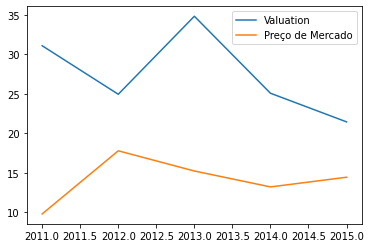

In [21]:
#Gráfico de Preços

mp1 = yf.download('TUPY3.SA', start='2011-12-29',end='2011-12-31',)['Adj Close']
mp2 = yf.download('TUPY3.SA', start='2012-12-28',end='2012-12-31',)['Adj Close']
mp3 = yf.download('TUPY3.SA', start='2013-12-29',end='2013-12-31',)['Adj Close']
mp4 = yf.download('TUPY3.SA', start='2014-12-30',end='2014-12-31',)['Adj Close']
mp5 = yf.download('TUPY3.SA', start='2015-12-30',end='2015-12-31',)['Adj Close']

plt.plot([2011,2012,2013,2014,2015],[Preço1_1,Preço1_2,Preço1_3,Preço1_4,Preço1_5], label='Valuation')
plt.plot([2011,2012,2013,2014,2015],[mp1,mp2,mp3,mp4,mp5], label='Preço de Mercado')
plt.legend()
plt.show()

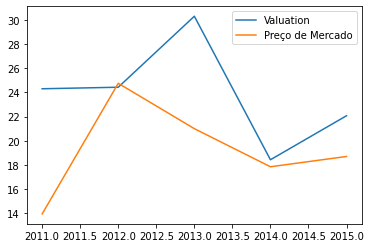

In [20]:
#Preços de mercado sem ajuste

mp2_1 = 13.95
mp2_2 = 24.75
mp2_3 = 21.00
mp2_4 = 17.85
mp2_5 = 18.70

plt.plot([2011,2012,2013,2014,2015],[Preço2_1,Preço2_2,Preço2_3,Preço2_4,Preço2_5], label='Valuation')
plt.plot([2011,2012,2013,2014,2015],[mp2_1,mp2_2,mp2_3,mp2_4,mp2_5], label='Preço de Mercado')
plt.legend()
plt.show()